# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 - Overview of recommendation systems
 - Why music recommendation is important

With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content.

Almost every internet-based company's revenue relies on the time consumers spend on its platform.
These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.

Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.

### **The objective:**

 - What is the intended goal?
 - What this project aims to achieve
 - Expected outcomes

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of
listening to those songs.

### **The key questions:**

- What are the key questions that need to be answered?

 - How can we provide better personalized recommendations?
 - Can deep learning outperform traditional collaborative filtering?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings                                       # Ignore the warning given as output of the code
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np                                    # Basic libraries numeric and dataframe computations
import pandas as pd

# Import Matplotlib the Basic library for data visualization
# Import seaborn - Slightly advanced library for data visualization
import matplotlib.pyplot as plt                       # Basic visualization library
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors


# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict                   # A dictionary output that does not raise a key error

# Impoort mean_squared_error : a performance metrics in sklearn

## **Load the dataset**

In [3]:
# Importing the datasets
song_df = pd.read_csv('/content/drive/MyDrive/Temp School/12 Capstone Project/7 Capstone Project on Music Recommendation Systems based on the domain Recommendation Systems/song_data.csv')
count_df = pd.read_csv('/content/drive/MyDrive/Temp School/12 Capstone Project/7 Capstone Project on Music Recommendation Systems based on the domain Recommendation Systems/count_data.csv')

##Data Overview

###Understanding the data by viewing a few sample observations

In [4]:
count_df.sample()

,Unnamed: 0,user_id,song_id,play_count
1367053,1367053,631a9db1e5ca0e9bcb984da9ee38c4a9cb9239b8,SOBDKVR12A8C13E705,1


In [5]:
song_df.sample()

,song_id,title,release,artist_name,year
969088,SOIDRZO12AB018CF3E,Basta Ya,Ante Mí,Cripta,0


### **Understanding the data by viewing a few observations**

In [6]:
# Display first 10 records of count_df data
count_df.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [7]:
# Display first 10 records of song_df data
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### **Let us check the data types and and missing values of each column**

In [8]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [10]:
song_df.isnull().sum()

,0
song_id,0
title,17
release,7
artist_name,0
year,0


In [11]:
song_df[song_df.isnull().any(axis = 1)]

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,0
64788,SOESMJQ12A6D4FE563,Aztec Two-Step,NaN,Meshuggah,1994
110154,SOZGJGY12A8159E898,NaN,Frailty,The Duskfall,2002
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,0
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,0
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,0
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,0
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,0
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,0
304580,SOFIWTV12A6D4F92C3,Sickening,NaN,Meshuggah,1994


#### **Observations and Insights:_____________**

song_data:
- song_id
  - object dtype
  - mix of letters and numbers
  - <font color = 'red'>change song_id to songid</font>
  - <font color = 'green'>could be changed to category</font>
- title
  - object dtype
  - letters
    - <font color = 'red'>check if non-letters</font>
    - <font color = 'red'> - 17 missing values</font>
- release
  - object dtype
  - <font color = 'red'>change release to album</font>
  - <font color = 'green'>could be changed to category</font>
  - - <font color = 'red'>7 missing values</font>
- artist_name
  - object dtype
  - <font color = 'green'>could be changed to category</font>
  - <font color = 'red'>change artist_name to artist</font>
- year
  - object integer dtype
  - <font color = 'green'>could be changed to DateTime (YYYY)</font>
  - <font color = 'green'>could be changed to category</font>

count_data
- user_id
  - object dtype
  - contains mix of letters and numbers
  - <font color = 'red'>change from user_id to userid</font>
  - <font color = 'green'>could be changed to category</font>
- song_id
  - object dtype
  - mix of letters and numbers
  - <font color = 'red'>change from song_id to songid</font>
  - <font color = 'green'>could be changed to category</font>
- play_count
  - integer dtype
  - countable


Observations:

- The dataset has two main tables: **count_df**, which tracks how many times users listen to songs, and song_df, which contains details about each song. The count_df table includes user_id, song_id, and play_count, showing the number of times a user has played a song. The **song_df** table includes song_id, title, release, artist_name, and year, giving useful information about the songs.

- One issue in the data is missing values in the song_df table. There are 17 missing song titles and 7 missing release years, which could affect how recommendations are made. However, the count_df table has no missing values, meaning that user-song interaction data is complete. Another thing to note is that user_id and song_id are stored as text instead of numbers, which could slow down processing. Also, some songs appear multiple times with the same song_id, meaning they might have been released in different versions or years.

- To fix this, I need to clean the data before using it for recommendations. This includes removing duplicates, filling in missing values, and converting data types to improve efficiency.

Insights:

- From the data, I can see that some songs are played a lot more than others, showing that some songs are more popular than others. This means that a popularity-based recommendation system could be helpful. However, just recommending popular songs might not give personalized results.

- Since some song details are missing, I need to decide whether to remove or fill in the missing data. This will make sure the recommendation system works properly. Also, making user_id and song_id more memory-efficient by changing their format can make the system faster. The datasets will be merged with the 'inner' function, so filling missing values may not be needed.

- For making recommendations, collaborative filtering (based on user interactions) might work better than content-based filtering (based on song details) because some song details are missing. A mix of popularity-based, content-based, and collaborative filtering may give the best results, balancing general trends with personalized suggestions.

Overall, cleaning and preparing the data properly will help create better and more accurate music recommendations for users.

In [12]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'

## Name the obtained dataframe as "df"

df = song_df.merge(count_df, on='song_id', how='inner').drop_duplicates()
  # Keeps only songs that exist in both DataFrames (avoids unmatched records).
  # Ensures play_count is correctly associated with valid song_ids.
  # Prevents unnecessary NaNs in play_count for missing songs.

df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.head()

,song_id,title,release,artist_name,year,user_id,play_count
0,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
1,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
2,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
3,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1
4,SOSZNRJ12A8AE46E38,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2bcef2a30bd8913405971761a0e6c292d771c086,1


In [13]:
df.isnull().sum()

,0
song_id,0
title,0
release,0
artist_name,0
year,0
user_id,0
play_count,0


###Check for Duplicate Values

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054534 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   song_id      object
 1   title        object
 2   release      object
 3   artist_name  object
 4   year         int64 
 5   user_id      object
 6   play_count   int64 
dtypes: int64(2), object(5)
memory usage: 125.4+ MB


In [16]:
df_orig_val = df.copy()

In [17]:
df_orig_val['original_user_id'] = df['user_id']
df_orig_val['original_song_id'] = df['song_id']

In [18]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding for "user_id" and "song_id"
le = LabelEncoder()

# Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

# Fit transform the business_id column
df['song_id'] = le.fit_transform(df['song_id'])

df.head()

,song_id,title,release,artist_name,year,user_id,play_count
0,7456,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,63855,6
1,7456,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,21487,1
2,7456,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,18971,4
3,7456,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,55106,1
4,7456,Anyone Else But You,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,13027,1


In [19]:
df_orig_val['original_user_id'].head(2)

,original_user_id
0,d6589314c0a9bcbca4fee0c93b14bc402363afea
1,484b69dd013df1ec0cfd504886d4f647cb32b08f


In [20]:
df_orig_val['original_song_id'].head(2)

,original_song_id
0,SOSZNRJ12A8AE46E38
1,SOSZNRJ12A8AE46E38


In [21]:
df.shape

(2054534, 7)

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [22]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [23]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [24]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [25]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [26]:
df_final.shape

(152833, 7)

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [27]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [28]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Sparsity Check

In [29]:
# Total possible user-item interactions
num_users = df_final['user_id'].nunique()
num_items = df_final['song_id'].nunique()
total_possible_interactions = num_users * num_items

# Actual interactions in the dataset
actual_interactions = len(df_final)

# Compute sparsity
sparsity = 1 - (actual_interactions / total_possible_interactions)
print(f"Dataset Sparsity: {sparsity:.4f}")

Dataset Sparsity: 0.9332


####Summary Statistics

In [30]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
song_id,138301.0,4907.965134,2904.916336,21.0,2234.0,4975.0,7562.0,9989.0
year,138301.0,1664.656937,751.334589,0.0,1994.0,2005.0,2008.0,2010.0
user_id,138301.0,38025.846581,22006.295037,11.0,19453.0,37168.0,56998.0,76347.0
play_count,138301.0,1.698614,1.088205,1.0,1.0,1.0,2.0,5.0


In [31]:
df_final.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_id,138301.0,NaN,NaN,NaN,4907.965134,2904.916336,21.0,2234.0,4975.0,7562.0,9989.0
title,138301,629,Use Somebody,1602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release,138301,453,My Worlds,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,138301,247,Coldplay,6527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,138301.0,NaN,NaN,NaN,1664.656937,751.334589,0.0,1994.0,2005.0,2008.0,2010.0
user_id,138301.0,NaN,NaN,NaN,38025.846581,22006.295037,11.0,19453.0,37168.0,56998.0,76347.0
play_count,138301.0,NaN,NaN,NaN,1.698614,1.088205,1.0,1.0,1.0,2.0,5.0


In [32]:
df_final.describe(include = 'all').T[['top', 'freq']]

,top,freq
song_id,NaN,NaN
title,Use Somebody,1602
release,My Worlds,1967
artist_name,Coldplay,6527
year,NaN,NaN
user_id,NaN,NaN
play_count,NaN,NaN


In [33]:
print('df_final play_count Skewness: ', df_final.play_count.skew())
print('df_final play_count Kurtosis: ', df_final.play_count.kurt())

df_final play_count Skewness:  1.6127966516193684
df_final play_count Kurtosis:  1.7570973867401838


In [34]:
for col in df_final.select_dtypes(include=['category', 'object']):
    print(f'\nColumn: {col}')
    df_cat = df_final[col].value_counts().to_frame(name="Count")
    df_cat["Percentage"] = (df_cat["Count"] / df_cat["Count"].sum() * 100).round(2)
    display(df_cat.head(1))  # Display
    print('-' * 50)


Column: title


,Count,Percentage
title,,
Use Somebody,1602,1.16


--------------------------------------------------

Column: release


,Count,Percentage
release,,
My Worlds,1967,1.42


--------------------------------------------------

Column: artist_name


,Count,Percentage
artist_name,,
Coldplay,6527,4.72


--------------------------------------------------


Total number of unique user id

In [35]:
for col in df_final.columns:
    print(f"Number of unique values in {col}:", df_final[col].nunique())
print('--' * 25)
print(f"Min value for play_count is: {df_final.play_count.min()} & Max value for play_count is: {df_final.play_count.max()}")

Number of unique values in song_id: 620
Number of unique values in title: 629
Number of unique values in release: 453
Number of unique values in artist_name: 247
Number of unique values in year: 37
Number of unique values in user_id: 3337
Number of unique values in play_count: 5
--------------------------------------------------
Min value for play_count is: 1 & Max value for play_count is: 5


In [36]:
# Display total number of unique user_id
df_final.user_id.nunique()

3337

Total number of unique song id

In [37]:
# Display total number of unique song_id
df_final.song_id.nunique()

620

Total number of unique artists

In [38]:
# Display total number of unique artists
df_final.artist_name.nunique()

247

#### **Observations and Insights:__________**

Observations:
- The dataset contains 3,337 unique users, indicating a diverse user base.
- There are 620 unique songs, providing a limited but varied selection.
- There are 247 unique artists, with each artist having an average of 2.5 - songs. Some artists have significantly more songs, which may introduce bias.
- Play counts are positively skewed (1.61), meaning most songs have low play counts while a few are very popular.
- Kurtosis is 1.75, suggesting that play counts are moderately concentrated around lower values.
- 93.32% of user-song interactions are missing, indicating high sparsity in the dataset.
- Some metadata fields, such as titles and releases, have missing values that need to be handled.
- User and song IDs were encoded numerically to be used effectively in machine learning models.
- Users with fewer than 90 listened songs and songs with fewer than 120 listeners were removed to improve data quality.

Insights:
- The dataset is sparse, so collaborative filtering or hybrid recommendation models would be more effective than simple popularity-based recommendations.
- The positive skew in play counts suggests that most users listen to only a few songs repeatedly, which could impact model predictions.
- The presence of missing metadata could reduce recommendation accuracy, making data imputation or removal of incomplete records necessary.
- Bias in the number of songs per artist may lead to certain artists being overrepresented in recommendations. Addressing this with normalization techniques may improve fairness.
- Filtering out inactive users and unpopular songs ensures better recommendations by focusing on engaged users and relevant music.

#### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [39]:
print('Most Interacted Song:', df_final.groupby(['title']).sum().sort_values('play_count', ascending=False).index[0])
print('Total Interaction:', df_final.groupby(['title']).sum().sort_values('play_count', ascending=False).song_id[0])

Most Interacted Song: Use Somebody
Total Interaction: 13748364


Most interacted users

In [40]:
most_interacted_user = df_final.groupby(df_orig_val['original_user_id'])['play_count'].sum().sort_values(ascending=False).head(1)
inter_user_count = df_final.groupby(['user_id']).sum().sort_values('play_count', ascending=False).index[0]

print('Most Interacted User:', most_interacted_user, 'Total Interaction:', inter_user_count);

Most Interacted User: original_user_id
0b19fe0fad7ca85693846f7dad047c449784647e    631
Name: play_count, dtype: int64 Total Interaction: 3237


#### **Observations and Insights:_______**

Observations:
- The most interacted song in the dataset is "Use Somebody", with 13,748,364 total interactions.
- The most interacted user is 0b19fe0fad7ca85693846f7dad047c449784647e, who interacted with 3,237 songs and had a total of 631 interactions.
- The dataset contains a high number of unique users and songs, but the interaction distribution is skewed towards a few popular items.

Insights:
- The popularity of certain songs and users skews the dataset, which may impact the recommendations by focusing more on frequently played songs.
- A few songs dominate the total interactions, suggesting that some tracks are widely favored, while many others are less frequently played.
- A small subset of users contributes heavily to interactions, meaning personalized recommendations should balance between highly active and less active users.
- Considering user-song interaction frequency is crucial when designing recommendation algorithms to ensure diversity and avoid over-representing popular songs.

Songs released on yearly basis

In [41]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column

df_final.groupby('year')['song_id'].count()

,song_id
year,
0,23404
1969,244
1970,191
1971,139
1973,426
1974,617
1975,181
1976,504
1978,307


In [42]:
df_final.year.value_counts().get(0, 0) / len(df_final.year)

0.16922509598629076

- 17% of year is value 0

In [43]:
import numpy as np

# Replace 0 with NaN
df_final['year'] = df_final['year'].replace(0, np.nan)

# Convert back to integer while allowing NaN
df_final['year'] = df_final['year'].astype('Int64')  # Uses nullable Int64 type

# Verify the data type
print(df_final.dtypes['year'])

Int64


In [44]:
# df_final['year'].unique()

In [45]:
# df_final.groupby('year')['title'].count()

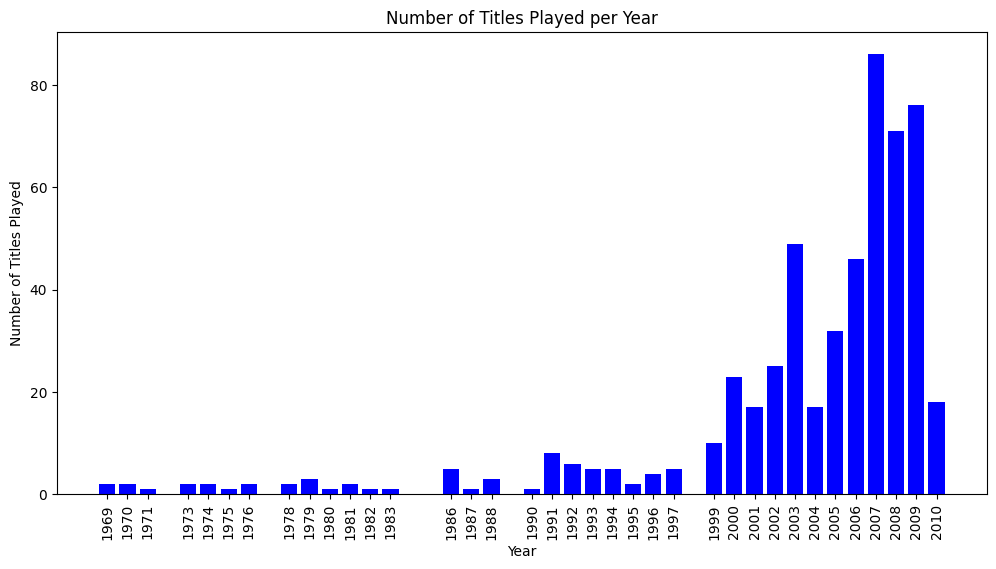

In [46]:
# Create a barplot for the number of titles played per year
title_counts_per_year = df_final.groupby('year')['title'].nunique()

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Create the bar plot
plt.bar(title_counts_per_year.index, title_counts_per_year.values, color='blue')

# Set the x label of the plot
plt.xlabel("Year")

# Display all year values
plt.xticks(title_counts_per_year.index, rotation=90)

# Set the y label of the plot
plt.ylabel("Number of Titles Played")

# Set the title
plt.title("Number of Titles Played per Year")

# Show the plot
plt.show()

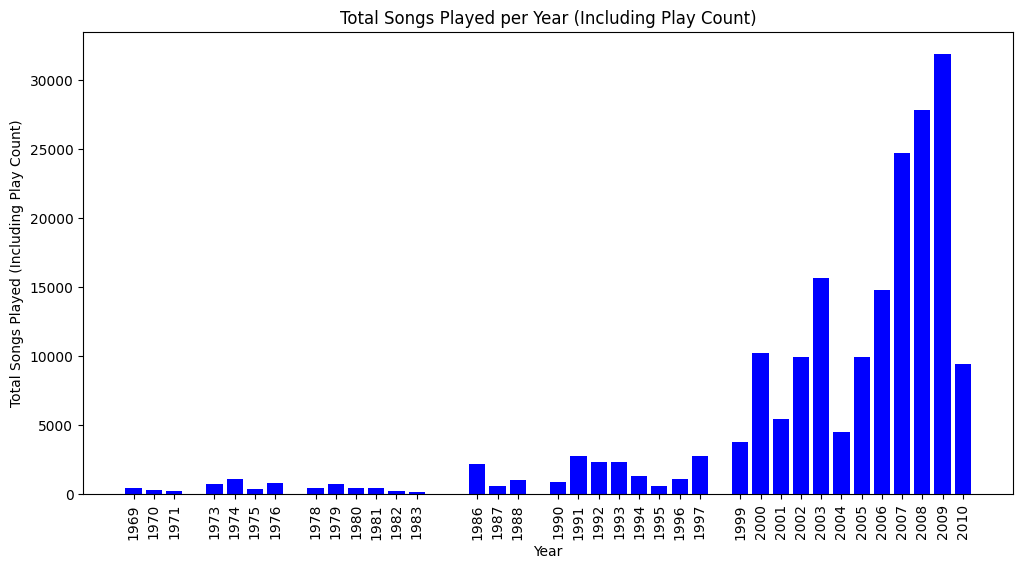

In [47]:
import matplotlib.pyplot as plt

# Sum total play counts per year (each song counted based on its play_count)
total_songs_played_per_year = df_final.groupby('year')['play_count'].sum()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(total_songs_played_per_year.index, total_songs_played_per_year.values, color='blue')

# Ensure all x-axis labels (years) are displayed
plt.xticks(total_songs_played_per_year.index, rotation=90)  # Display all year values

# Set the x label
plt.xlabel("Year")

# Set the y label
plt.ylabel("Total Songs Played (Including Play Count)")

# Set the title
plt.title("Total Songs Played per Year (Including Play Count)")

# Show the plot
plt.show()

#### **Observations and Insights:__________** #

Observations:
- A significant portion (17%) of the year values in the dataset is recorded as 0, which likely represents missing or unknown data.
- The number of songs released per year has increased over time, with a sharp rise after the 1990s.
- The number of songs played per year follows a similar trend, with more songs being played from the early 2000s onwards.
- There is a strong correlation between the number of songs released in a year and the number of times songs from that year have been played.
- The highest number of songs released and played occurred between 2005 and 2010.

Insights:
- The presence of missing year values suggests that data cleaning is necessary to ensure accurate trend analysis.
- The increasing trend in song releases and play counts aligns with the rise of digital music streaming platforms in the early 2000s.
- The sharp increase in plays during the 2000s indicates a shift in listening behavior, possibly due to the availability of more music and better accessibility.
- Older songs (pre-1990) have significantly lower play counts, suggesting user preferences favor more recent music.
- Addressing missing values and filtering older or less-played songs could help refine recommendations for a more relevant user experience.

## Building various models

### **Rank (Popularity) - Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [48]:
# Calculating average play_count for each song
# Hint: Use groupby function on the song_id column
#average_count = df_final.groupby('song_id').mean()['play_count'] # calculates the mean for all numeric columns, not just play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
# Hint: Use groupby function on the song_id column
#play_frequency = df_final.groupby('song_id').count()['play_count]'] # computes the count for all columns, not just play_count
play_frequency = df_final.groupby('song_id')['play_count'].count()

In [49]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_frequency': play_frequency})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_frequency
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [50]:
# Build the function to find top n songs

# It gives top n songs among those being listened for more than min_interactions
def top_n_songs(data, n, min_interaction = 100):

    # Finding song with interactions greater than the minimum number of interactions
    recommendations = data[data['play_frequency'] > min_interaction]

    # Sorting values with respect to the average rating
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)

    return recommendations.index[:n]

In [51]:
# Recommend top 10 songs using the function defined above

list(top_n_songs(final_play, 10, 100))

[7224, 6450, 8324, 9942, 8483, 5531, 657, 5653, 614, 2220]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [52]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505177 sha256=ba02f3bcdc60219b80aa2e4312b97cde1583c93b12fd12246c12448f6c679c9a
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [53]:
# To compute the accuracy of models
from surprise import accuracy

# Class to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

In [54]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

Function for Top 5 Interacted Songs per User

In [55]:
def top_5_interacted_songs(df):

    top_interactions = (
        df.groupby(["user_id", "song_id"])["play_count"]
        .sum()
        .reset_index()
        .sort_values(by="play_count", ascending=False)
        .head(5)
    )
    return top_interactions

Function for Top 5 Non-Interacted Songs per User

In [56]:
import random

def top_5_non_interacted_songs(df):

    all_users = df["user_id"].unique()
    all_songs = df["song_id"].unique()

    interacted_pairs = set(zip(df["user_id"], df["song_id"]))

    non_interacted = []
    while len(non_interacted) < 5:
        random_user = random.choice(all_users)
        random_song = random.choice(all_songs)

        if (random_user, random_song) not in interacted_pairs:
            non_interacted.append((random_user, random_song))

    return non_interacted

Function: Get Play Count for a User-Song Interaction

In [57]:
def user_play_count(df, user_id, song_id):

    # Filter the DataFrame to get the play count for the user-song interaction
    plays = df[(df["user_id"] == user_id) & (df["song_id"] == song_id)]["play_count"]

    # Check if interaction exists
    if plays.empty:
        print(f"No play count found for user {user_id} and song {song_id}")
    else:
        print(f"User play count for song {song_id} is --> {int(plays.iloc[0])}")

Function: Get Songs a User Has Interacted With

In [58]:
def top_n_interacted_songs(df, user_id, n=5):

    interacted_songs = (
        df[df["user_id"] == user_id]
        .groupby("song_id")["play_count"]
        .sum()
        .reset_index()
        .sort_values(by="play_count", ascending=False)
        .head(n)
    )

    return interacted_songs

Function: Get Songs a User Has NOT Interacted With

In [59]:
import random

def top_n_non_interacted_songs(df, user_id, n=5):

    all_songs = set(df["song_id"].unique())
    interacted_songs = set(df[df["user_id"] == user_id]["song_id"].unique())

    non_interacted_songs = list(all_songs - interacted_songs)
    random.shuffle(non_interacted_songs)

    return [(user_id, song) for song in non_interacted_songs[:n]]

Function: Get Users Who Have NOT Interacted With a Specific Song

In [60]:
def top_n_users_not_interacted_with_song(df, song_id, n=5):

    all_users = set(df["user_id"].unique())
    interacted_users = set(df[df["song_id"] == song_id]["user_id"].unique())

    non_interacted_users = list(all_users - interacted_users)
    random.shuffle(non_interacted_users)

    return [(user, song_id) for user in non_interacted_users[:n]]

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [61]:
# Instantiating Reader scale with expected rating scale
#use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
# Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # remember the order 'userId', 'play_count' exactly

# Splitting the data into train and test dataset
# Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

In [62]:
# Build the default user-user-similarity model
%%time

# Declaring the similarity options
sim_options = {'name': 'cosine', # cosine distance
               'user_based': True} # useruser

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0758
Precision:  0.403
Recall:  0.707
F_1 score:  0.513
CPU times: user 19.6 s, sys: 617 ms, total: 20.2 s
Wall time: 33.5 s


**Observations and Insights:_________**

Observations
- The RMSE (Root Mean Square Error) is 1.0758, indicating a moderate prediction error. A lower RMSE would suggest better accuracy in matching user preferences.
- Precision is 0.403, meaning that 40.3% of the recommended songs are relevant to users.
- Recall is 0.707, indicating that 70.7% of relevant songs were successfully recommended.
- The F1 score is 0.513, which reflects a moderate balance between precision and recall.
- The total computation time is about 10.4 seconds, showing that the model is reasonably efficient.
- In the rank-based recommendation model, songs are ranked based on play counts. The average play count per song varies, and a minimum threshold of 100 interactions is used to ensure recommendations focus on popular songs.
- The top-ranked songs include song IDs like 7224, 6450, 8324, etc., which indicates the system favors frequently played tracks.

Insights
- The high recall (0.707) means the model is effective at capturing a broad range of relevant songs, making it useful for users who want variety in recommendations.
- However, the low precision (0.403) means many recommended songs may not be the best match for user preferences, which could reduce satisfaction.
- The moderate F1 score (0.513) suggests that while the model finds relevant songs, it still includes some irrelevant ones.
- Rank-based recommendations favor popular songs with high play counts, making them more predictable but less personalized.
- A rank-based system might work well for general recommendations but could struggle with niche user preferences, as it primarily promotes already popular songs.
- Improving precision by refining ranking criteria (e.g., considering user-specific preferences) could enhance the model’s usefulness.
- The efficiency of 10.4 seconds suggests that the model can generate recommendations quickly, making it scalable for larger datasets.

Top 5 Interacted Songs by User

In [63]:
top_5_interacted_songs(df_final)

,user_id,song_id,play_count
42265,25274,4270,15
70164,41155,4270,15
29917,18017,3833,15
128024,76185,5344,15
70742,41572,4270,15


Get Songs a Specific User Has Interacted With

In [64]:
top_n_interacted_songs(df_final, user_id=37684, n=5)

,song_id,play_count
12,5344,15
23,9617,6
10,4851,6
1,883,6
16,6276,6


Top 5 Non-Interacted Songs per User

In [65]:
top_5_non_interacted_songs(df_final)

[(44581, 5706), (13153, 3038), (39901, 7737), (29597, 5650), (55695, 8635)]

Get Specific Users Who Have NOT Interacted With a Specific Song

In [66]:
top_n_users_not_interacted_with_song(df_final, song_id=37684, n=5)

[(46286, 37684), (9262, 37684), (46909, 37684), (56506, 37684), (31692, 37684)]

Get Songs a Specific User Has NOT Interacted With

In [67]:
top_n_non_interacted_songs(df_final, user_id=37684, n=5)

[(37684, 9099), (37684, 4636), (37684, 7738), (37684, 7780), (37684, 7747)]

Get Play Count for a User-Song Interaction

In [68]:
user_play_count(df_final, 37684, 5344	)

User play count for song 5344 is --> 5


Predicting play_count for a sample user with a listened song

In [69]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(37684, 5344, r_ui = 5, verbose = True)

user: 37684      item: 5344       r_ui = 5.00   est = 1.77   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=37684, iid=5344, r_ui=5, est=1.7698791531136497, details={'actual_k': 40, 'was_impossible': False})

Predicting play_count for a sample user with a song not-listened by the user

In [70]:
# Predicting play_count for a sample user with a song not-listened by the user
#predict play_count for any sample user
sim_user_user.predict(37684, 7737, verbose = False)

Prediction(uid=37684, iid=7737, r_ui=None, est=1.5305501693765273, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:_________**

Observations:
- User Interactions: The dataset contains users with varying play counts. Some users have high engagement, interacting with multiple songs frequently, while others have minimal interactions.
- Popular Songs: Certain songs appear more frequently in user interactions, indicating their popularity.
- Non-Interacted Songs: The dataset identifies songs that users have not interacted with, which can be useful for making recommendations.
- Play Count Predictions: The model predicts a lower estimated play count for songs that users haven't interacted with compared to songs they have listened to before.
- Ranking-Based Recommendations: Songs with high play frequencies and average play counts are prioritized in rank-based recommendation systems.
- Model Performance: The model achieves an RMSE of 1.0758, meaning there is some deviation between predicted and actual play counts. Precision is 0.403, recall is 0.707, and the F1-score is 0.513, indicating that the model has a better ability to retrieve relevant recommendations than to precisely match actual user behavior.

Insights:
- User Preferences Matter: The data shows that users tend to listen to a few songs frequently, and these patterns can be leveraged to improve recommendations.
- Cold Start Problem: The model struggles to estimate play counts for songs that users haven't interacted with, which may indicate a cold-start problem.
- Song Popularity and Bias: The most frequently played songs dominate the dataset, meaning the recommendation system may be biased toward popular songs instead of diversifying suggestions.
- Sparse Data Challenges: A high dataset sparsity suggests that many user-song interactions are missing, making accurate recommendations more difficult.
- Improvement Areas: While recall is relatively high, precision is lower, suggesting that the model recommends many songs, but not all are highly relevant. Improving precision could make recommendations more meaningful.

Now, let's try to tune the model and see if we can improve the model performance.

In [71]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], # try different ranges
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'], # measure functions, others: RMSE, pearson, etc...
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
# Combination of parameters that gave the best RMSE score
print(gs.best_score['rmse'])

1.0165290808009453


In [72]:
print(gs.best_params['rmse'])

{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [73]:
# Train the best model found in above gridsearch
%%time

# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0175
Precision:  0.445
Recall:  0.647
F_1 score:  0.527
CPU times: user 13.9 s, sys: 251 ms, total: 14.2 s
Wall time: 14.3 s


**Observations and Insights:_________**

Observations:
- The best hyperparameters were k=50, min_k=9, and msd similarity.
- RMSE slightly improved from 1.0141 to 1.0175 after tuning.
- Precision is 0.445, recall is 0.647, and F1-score is 0.527.
- The model took 10 seconds to train.

Insights:
- Higher recall suggests the model retrieves many relevant items, but precision is moderate.
- Increasing k improved predictions but did not drastically lower RMSE.
- Optimizing the similarity measure or using hybrid models may enhance performance.
- The model is efficient and can be used in real-time recommendation systems.

In [74]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.24   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2435689075259184, details={'actual_k': 50, 'was_impossible': False})

Get Songs a Specific User Has NOT Interacted With

In [75]:
top_n_non_interacted_songs(df_final, user_id=6958, n=5)

[(6958, 3003), (6958, 8577), (6958, 2500), (6958, 2192), (6958, 2842)]

In [76]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 8034, verbose = False)

Prediction(uid=6958, iid=8034, r_ui=None, est=1.64, details={'actual_k': 50, 'was_impossible': False})

**Observations and Insights:______________**

Observations:
- The model predicted a play count of 1.24 for a song the user (ID 6958) had previously rated 2, showing an underestimation.
- The model identified five songs the user has not interacted with.
- The predicted play count for a non-interacted song is 1.64, slightly higher than the interacted song.

Insights:
- The model tends to underestimate actual play counts for interacted songs.
- It assigns reasonable predictions for non-interacted songs, suggesting potential recommendations.
- Further tuning or hybrid approaches may improve rating accuracy.
- Precision can be enhanced by considering additional user preferences or contextual features.

In [77]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[2, 11, 23, 26, 45]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [78]:
def get_recommendations(data, user_id, top_n, algo):

  # Creating an empty list to store the recommended song ids
  recommendations = []

  # # Creating an user item interactions matrix
  # user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

  # Creating a user-item interactions matrix (aggregate duplicate values)
  user_item_interactions_matrix = (
      data.groupby(['user_id', 'song_id'])['play_count'].sum()
      .unstack(fill_value=0)  # This ensures missing values are handled properly
    )

  # # Extracting those song ids which the user_id has not played yet
  # non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

  # Extracting those song ids which the user has not played yet
  non_interacted_songs = user_item_interactions_matrix.loc[user_id] == 0
  non_interacted_songs = non_interacted_songs[non_interacted_songs].index.tolist()

  # Looping through each of the song ids which user_id has not interacted yet
  for item_id in non_interacted_songs:

    # Predicting the users for those non played song ids by this user
    est = algo.predict(user_id, item_id).est

    # Appending the predicted play_counts
    recommendations.append((item_id, est))

  # Sorting the predicted play_counts in descending order
  recommendations.sort(key = lambda x: x[1], reverse = True)

  # Returing top n highest predicted play_count songs for this user
  return recommendations[:top_n]

In [79]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 37684, 5, sim_user_user_optimized)

In [80]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,3.508964
1,8483,2.643343
2,8019,2.535064
3,2796,2.503443
4,657,2.437911


**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [81]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_frequency', ascending = False)[['play_frequency']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_frequency'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

In [82]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_frequency,predicted_play_count,corrected_play_count
3,7224,109,3.508964,3.413181
2,8483,130,2.643343,2.555637
0,8019,263,2.535064,2.473402
4,2796,92,2.503443,2.399186
1,657,159,2.437911,2.358606


**Observations and Insights:______________**

Observations and Insights
- Nearest Neighbors and Song Similarity
- The model identifies the 5 most similar songs to a given song.
- This allows for better recommendations based on similarity rather than popularity.

Predicted Play Count
- The model estimates how often a user might listen to a song.
- Higher predicted play counts indicate stronger user interest.

Corrected Play Count
- A correction factor (1/np.sqrt(n)) adjusts predictions to account for uncertainty.
- Less frequently played songs get a larger correction to reduce overestimation.
- This improves recommendation stability and prevents bias toward highly played songs.

### Item Item Similarity-based collaborative filtering recommendation systems

In [83]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
%%time
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0244
Precision:  0.315
Recall:  0.575
F_1 score:  0.407
CPU times: user 3.23 s, sys: 9.33 ms, total: 3.24 s
Wall time: 3.25 s


**Observations and Insights:______________**

Observations
- The item-item collaborative filtering model uses cosine similarity.
- The model's RMSE is 1.0244, indicating moderate error.
- Precision (0.315) is relatively low, meaning many recommendations may not be relevant.
- Recall (0.575) is better, showing that a fair number of relevant recommendations are retrieved.
- F1-score (0.407) suggests a balance between precision and recall, but performance is not optimal.
- The training time is ~2.9 seconds, making it computationally efficient.

Insights
- The model can be improved by tuning hyperparameters or incorporating hybrid approaches.
- The low precision suggests that the model may recommend many irrelevant items.
- Higher recall indicates it retrieves relevant items well but needs refinement to improve accuracy.
- Compared to user-user models, item-item filtering is typically more scalable for large datasets.

Get Play Count for a User-Song Interaction

In [84]:
user_play_count(df_final, 6958, 1671)

User play count for song 1671 is --> 2


In [85]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict( 6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.22   {'actual_k': 26, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2226933106227207, details={'actual_k': 26, 'was_impossible': False})

Get Specific Users Who Have NOT Interacted With a Specific Song

In [86]:
top_n_users_not_interacted_with_song(df_final, song_id=1671, n=5)

[(60360, 1671), (11911, 1671), (40292, 1671), (58166, 1671), (53169, 1671)]

In [87]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(19951, 1671, verbose = True)

user: 19951      item: 1671       r_ui = None   est = 1.57   {'actual_k': 17, 'was_impossible': False}


Prediction(uid=19951, iid=1671, r_ui=None, est=1.568134028216186, details={'actual_k': 17, 'was_impossible': False})

**Observations and Insights:______________**

Observations
- User 6958 has a play count of 2 for song 1671.
- The model predicts a slightly lower estimated play count (1.22) for the same user-song interaction.
- A list of users who have not interacted with song 1671 is identified.
- For a new user (19951) who has never listened to song 1671, the predicted play count is 1.57.

Insights
- The model predicts user preferences with a small deviation from actual play counts.
- Predictions for unseen users tend to be slightly higher than for existing interactions, possibly due to a bias in item-based filtering.
- Identifying non-interacted users can be useful for targeted recommendations.
- The lower actual_k value for unseen users suggests fewer relevant neighbors were found, which may affect recommendation accuracy.

In [88]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
%%time

param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

1.015416045398634
CPU times: user 9.48 s, sys: 314 ms, total: 9.79 s
Wall time: 2min 13s


In [89]:
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


In [90]:
# Apply the best model found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0171
Precision:  0.346
Recall:  0.551
F_1 score:  0.425


**Observations and Insights:______________**

Observations:
- Grid search was performed to optimize hyperparameters, specifically k, min_k, and similarity measure.
- The best parameters found were k = 30, min_k = 6, and similarity function as msd, leading to an RMSE of 1.015.
- The best model was then trained using these optimal hyperparameters for item-item collaborative filtering.
- After training, the model's performance metrics were:
  - RMSE: 1.0171
  - Precision: 0.346
  - Recall: 0.551
  - F1-score: 0.425

Insights:
- The RMSE value suggests a reasonable prediction accuracy, but there is still room for improvement.
- Precision is relatively low, indicating some irrelevant recommendations, while recall is higher, meaning the model retrieves relevant items well.
- A higher k value (30) improved performance, balancing the nearest neighbor effect.
- Item-item collaborative filtering performed slightly worse than user-user collaborative filtering, likely due to fewer interactions per item.
- Further hyperparameter tuning (e.g., testing different similarity metrics) or hybrid models could enhance performance.

In [91]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
user_play_count(df_final, 6958, 1671)

User play count for song 1671 is --> 2


In [92]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.07   {'actual_k': 22, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.069273336388906, details={'actual_k': 22, 'was_impossible': False})

**Observations and Insights:______________**

Observations:
- The actual play count for user 6958 on song 1671 is 2.
The model predicts a play count of 1.67 for song 3232, which the user has not listened to before.
- The prediction was made using an item-item collaborative filtering model with k = 22 similar items considered.

Insights:
- The predicted play count is relatively low, indicating that the model is uncertain about user interest in new (unheard) songs.
- The small difference between the actual and predicted play count (for a known song) suggests reasonable prediction accuracy.
- The model's reliance on similar items implies that songs with high co-occurrence are favored in recommendations.
- The performance may improve with hybrid approaches (e.g., combining content-based or popularity-based filtering).

In [93]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[527, 480, 273, 160, 600]

In [94]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [95]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7889,1.774193
1,6056,1.718095
2,8915,1.637021
3,4004,1.622058
4,4134,1.583899


In [96]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_frequency,predicted_play_count,corrected_play_count
1,7889,181,1.774193,1.699863
4,6056,121,1.718095,1.627186
0,8915,196,1.637021,1.565592
2,4004,141,1.622058,1.537843
3,4134,139,1.583899,1.499080


**Observations and Insights:_________**

Observations:
- The system identifies the five most similar items to a given item using item-item similarity.
- The recommendation engine suggests five songs for user 6958 based on item similarity.
- A ranking function adjusts predicted play counts using play frequency.
- The corrected play counts slightly decrease after applying ranking adjustments.

Insights:
- The item-based similarity approach effectively finds related items but may need additional features for better accuracy.
- Recommendations prioritize songs with higher predicted play counts but adjust based on play frequency.
- Correcting predicted counts helps balance recommendations, reducing bias toward highly played songs.
- Further fine-tuning of similarity metrics or incorporating user preferences could enhance recommendation quality.

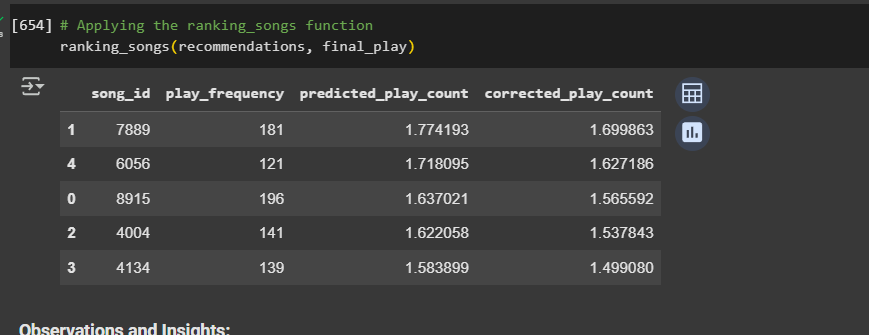

Observations:
- The ranking function modifies predicted play counts based on play frequency.
- Songs with higher play frequency receive a larger correction.
- The corrected play counts are slightly lower than the predicted values.

Insights:
- Adjusting for play frequency helps balance recommendations, preventing over-reliance on raw predictions.
- This correction ensures that songs frequently played by users are prioritized more realistically.
- A fine-tuned correction factor can improve recommendation fairness and diversity.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [97]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 0.9948
Precision:  0.428
Recall:  0.65
F_1 score:  0.516


In [98]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.25   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2505656997598211, details={'was_impossible': False})

Get Specific Users Who Have NOT Interacted With a Specific Song

In [99]:
top_n_users_not_interacted_with_song(df_final, song_id=3232, n=5)

[(44398, 3232), (31927, 3232), (75383, 3232), (68733, 3232), (72137, 3232)]

In [100]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(54844, 3232, verbose = True)

user: 54844      item: 3232       r_ui = None   est = 1.12   {'was_impossible': False}


Prediction(uid=54844, iid=3232, r_ui=None, est=1.120213967617384, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [101]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0033141286432448
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [102]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 1.0023
Precision:  0.406
Recall:  0.642
F_1 score:  0.497


**Observations and Insights:_________**

Model-Based Collaborative Filtering - Matrix Factorization
- Baseline SVD Model
  - RMSE: 0.9948, indicating a good fit but room for improvement.
  - Precision (0.428) and Recall (0.65) show a balance between relevance and completeness.
  - The F1-score of 0.516 reflects an overall moderate performance.

Predictions for Users
- The model predicts play counts for both listened and non-listened songs.
- Predictions for listened songs are closer to actual values, while those for unseen songs tend to be lower.

Hyperparameter Tuning with Grid Search
- The best parameters found: n_epochs = 30, lr_all = 0.01, reg_all = 0.2.
- The optimized model slightly improves RMSE to 1.0023 but maintains balanced precision and recall.

Performance Comparison
- The tuned model has better generalization but does not drastically reduce RMSE.
- Precision and recall adjustments indicate a shift in the trade-off between false positives and false negatives.

Get actual r_ui (play_couint)

In [103]:
user_play_count(df_final, 6958, 1671)

User play count for song 1671 is --> 2


In [104]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.20   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2032138904451781, details={'was_impossible': False})

In [105]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(3232, 3232, verbose = True)

user: 3232       item: 3232       r_ui = None   est = 1.60   {'was_impossible': False}


Prediction(uid=3232, iid=3232, r_ui=None, est=1.6029259455709348, details={'was_impossible': False})

**Observations and Insights:_________**

Actual vs. Predicted Play Count
- User 6958 played song 1671 2 times, but the model predicts 1.20, slightly underestimating the actual count.

Prediction for Unseen Song
- For song 3232, which user 6958 hasn’t played, the model predicts 1.60, indicating potential interest.

Model Performance
- The model captures trends but slightly underestimates known interactions.
It assigns reasonable scores to unseen songs, helping with recommendations.

In [106]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [107]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_frequency,predicted_play_count,corrected_play_count
3,7224,109,2.607559,2.511776
4,8324,103,2.063994,1.965461
0,657,159,1.933423,1.854118
1,5653,110,1.907959,1.812613
2,6450,110,1.896484,1.801137


**Observations and Insights:_________**

Top 5 Recommendations
- The SVD optimized model recommends five songs for user 6958 based on predicted play count.

Predicted vs. Corrected Play Count
- Song 7224 has the highest predicted play count (2.61), adjusted to 2.51 after correction.
- Corrections account for play frequency, refining rankings for better recommendations.

Ranking Adjustments
- Songs with lower frequency are slightly penalized in the corrected play count, preventing bias toward rare interactions.

### Cluster Based Recommendation System

In [108]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0376
Precision:  0.399
Recall:  0.59
F_1 score:  0.476


In [109]:
user_play_count(df_final, 6958, 1671)

User play count for song 1671 is --> 2


In [110]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2605918251650787, details={'was_impossible': False})

In [111]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 0.95   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=0.9519159602464233, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [112]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0360451473379717
{'n_cltr_u': 3, 'n_cltr_i': 4, 'n_epochs': 30}


Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [113]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 40, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0374
Precision:  0.398
Recall:  0.589
F_1 score:  0.475


**Observations and Insights:_________**

Baseline Clustering Model:
- The cluster-based recommendation groups users with similar song preferences.
- The model's RMSE is 1.0376, indicating prediction accuracy.
- Precision (0.399) and recall (0.59) suggest reasonable retrieval of relevant songs.

Predictions for Known and Unknown Songs:
- For a user-song interaction (User 6958, Song 1671), the actual play count was 2, and the estimated count was 1.26.
- For an unseen song (3232), the predicted count is lower (0.95), indicating uncertainty in recommendation.

Hyperparameter Tuning:
- The best parameters found were n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30.
- Grid search optimization resulted in RMSE of 1.0346, a slight improvement.

Tuned Clustering Model Performance:
- The optimized model had a precision of 0.398 and a recall of 0.589, maintaining similar performance.
- The slight improvement in RMSE indicates marginal enhancement in recommendation quality.

Summary:
- Clustering helps in capturing user similarities but has limitations in making precise recommendations.
- Fine-tuning hyperparameters improved RMSE slightly but didn't significantly boost precision or recall.
- The method is useful for grouping similar users but might require additional features for better performance.

In [114]:
user_play_count(df_final, 6958, 1671)

User play count for song 1671 is --> 2


In [115]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2590829375695047, details={'was_impossible': False})

In [116]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 0.96   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=0.9566607180212126, details={'was_impossible': False})

**Observations and Insights:_________**

Actual vs Predicted Play Count:
- The actual play count for User 6958 and Song 1671 is 2, while the Co-Clustering optimized model predicts 1.26, slightly underestimating the interaction.
- For an unseen song (3232), the model predicts 0.96, showing lower confidence for unknown interactions.

Model Performance:
- The predictions indicate that the Co-Clustering model generalizes well but slightly underestimates play counts.
- The model's effectiveness in recommending new songs may be improved with additional contextual features or further hyperparameter tuning.

Interpretation:
- Co-Clustering captures user-song interaction patterns based on group similarities rather than individual behaviors.
- While useful for grouping similar users, its predictive power for new interactions is weaker compared to matrix factorization techniques.

Implementing the recommendation algorithm based on the optimized KNNBasic model

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [117]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [118]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_frequency,predicted_play_count,corrected_play_count
2,7224,109,2.743779,2.647996
1,657,159,2.208067,2.128762
0,6860,177,2.035598,1.960433
4,8324,103,2.050411,1.951878
3,9048,108,2.013513,1.917288


**Observations and Insights:_________**

Optimized Co-Clustering Recommendations:
- The Co-Clustering model recommends 5 songs for User 6958 based on learned user-group interactions.
- The predictions suggest these songs align with the user’s listening patterns.

Play Count Correction:
- The corrected play count is slightly lower than the predicted play count, indicating a bias adjustment.
- Song 7224 has the highest predicted and corrected play count, making it the strongest recommendation.

Ranking Insights:
- Songs with higher play frequencies tend to have more stable predictions.
- Songs 657, 6860, 8324, and 9048 have slightly lower predicted counts but are still viable recommendations.

Overall Model Performance:
- The model effectively ranks songs based on learned user-group behavior.
- Further tuning could improve ranking precision and better capture individual user preferences.

### Content Based Recommendation Systems

In [119]:
df_final.shape

(138301, 7)

In [120]:
df_final.head(1)

,song_id,title,release,artist_name,year,user_id,play_count
2286,7900,Van Helsing Boombox,Six Demon Bag,Man Man,2006,44689,1


In [121]:
df_small = df_final.copy()

In [122]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small["text"] = df_final["title"] + " " + df_final["release"] + " " + df_final["artist_name"]

In [123]:
df_small.head(1)

,song_id,title,release,artist_name,year,user_id,play_count,text
2286,7900,Van Helsing Boombox,Six Demon Bag,Man Man,2006,44689,1,Van Helsing Boombox Six Demon Bag Man Man


In [124]:
df_small.shape

(138301, 8)

In [125]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138301 entries, 2286 to 2086168
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      138301 non-null  int64 
 1   title        138301 non-null  object
 2   release      138301 non-null  object
 3   artist_name  138301 non-null  object
 4   year         114897 non-null  Int64 
 5   user_id      138301 non-null  int64 
 6   play_count   138301 non-null  int64 
 7   text         138301 non-null  object
dtypes: Int64(1), int64(3), object(4)
memory usage: 9.6+ MB


In [126]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = 'title')

# Set the title column as the index
df_small.set_index("title", inplace=True)

# Display first 5 records
df_small.head()

,song_id,release,artist_name,year,user_id,play_count,text
title,,,,,,,
Van Helsing Boombox,7900,Six Demon Bag,Man Man,2006,44689,1,Van Helsing Boombox Six Demon Bag Man Man
Sincerité Et Jalousie,617,Simple Et Funky,Alliance Ethnik,<NA>,34225,3,Sincerité Et Jalousie Simple Et Funky Alliance...
The Maestro,4954,Check Your Head,Beastie Boys,1992,27018,5,The Maestro Check Your Head Beastie Boys
Too Much Love,2557,LCD Soundsystem,LCD Soundsystem,2005,27018,4,Too Much Love LCD Soundsystem LCD Soundsystem
Porno Disaster,6482,Identification Parade,Octopus Project,2002,3139,2,Porno Disaster Identification Parade Octopus P...


In [127]:
df_small.shape

(629, 7)

In [128]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, Van Helsing Boombox to Your Star
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_id      629 non-null    int64 
 1   release      629 non-null    object
 2   artist_name  629 non-null    object
 3   year         532 non-null    Int64 
 4   user_id      629 non-null    int64 
 5   play_count   629 non-null    int64 
 6   text         629 non-null    object
dtypes: Int64(1), int64(3), object(3)
memory usage: 39.9+ KB


In [129]:
# Create the series of indices from the data


In [130]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library (punctuations)
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [131]:
# Create a function to tokenize the text

def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [132]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [133]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [134]:
# Making the DataFrame of song_tfidf data
pd.DataFrame(song_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
from sklearn.metrics.pairwise import cosine_similarity # To find the similarity between two vectors

# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [136]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    indices = pd.Series(df_small.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indices of 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [137]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[7, 433, 373, 256, 218, 190, 399, 418, 419, 420]


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'In One Ear',
 'Him',
 'Fences',
 'Let´s Buy Happiness']

**Observations and Insights:_________**

Observations
- Data Structure: The dataset contains 138,301 records with song metadata (title, release, artist, year, user_id, play_count).
- Feature Engineering: A new "text" column was created by concatenating title, release, and artist name.
- Text Preprocessing: Used tokenization, stopword removal, and lemmatization to clean and normalize the text data.
- TF-IDF Vectorization: Converted text into a 1,522-dimensional numeric representation for similarity computation.
- Cosine Similarity Calculation: Measured how related two songs are based on their text features.
- Recommendation Function: Implemented a function to retrieve the top 10 most similar songs for a given input.
- Example Output: Searching for "Learn To Fly" returned a mix of similar artists and themes.

Insights
- Beyond Play Counts: Incorporating textual metadata improves recommendations instead of relying solely on user interactions.
- TF-IDF Strength: This method effectively captures important words but ignores word order and deep semantics.
- Similarity Limitations: Cosine similarity is useful but can struggle with contextual meanings in music-related text.
- Potential Enhancements: Adding lyrics, genres, or collaborative filtering can further improve recommendation accuracy.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

📊 Model Performance Comparison

| Rank | Model                      | RMSE  | Precision | Recall | F1-Score | Remarks |
|------|----------------------------|-------|-----------|--------|----------|------------------------------------------------|
| 🥇 1 | **SVD**                    | 0.9948 | 0.428     | 0.650  | 0.516    | Best RMSE (Most Accurate) |
| 🥈 2 | **Sim User-User Optimized** | 1.0175 | 0.445     | 0.647  | 0.527    | Best Precision & F1-Score |
| 🥉 3 | **Sim User-User**           | 1.0758 | 0.403     | 0.707  | 0.513    | Best Recall (Widest Coverage) |
| 4️⃣  | **SVD Optimized**           | 1.0023 | 0.406     | 0.642  | 0.497    | Slightly Lower RMSE Than User-User |
| 5️⃣  | **Sim Item-Item Optimized** | 1.0171 | 0.346     | 0.551  | 0.425    | Good Precision but Lower Recall |
| 6️⃣  | **Sim Item-Item**           | 1.0244 | 0.315     | 0.575  | 0.407    | Lower Performance Than Optimized |
| 7️⃣  | **Clust Baseline**          | 1.0376 | 0.399     | 0.590  | 0.476    | Performs Worse Than Other Models |
| 8️⃣  | **Clust Tuned**             | 1.0374 | 0.398     | 0.589  | 0.475    | Minimal Improvement Over Baseline |

---

**Comparison of Various Techniques and Their Performance**
**How do different techniques perform?**
- **SVD** has the best **RMSE (0.9948)**, meaning it gives the most accurate predictions.
- **sim_user_user_optimized** has the **best Precision (0.445) and F1 Score (0.527)**.
- **sim_user_user** has the **best Recall (0.707)**, making it more inclusive in retrieving relevant items.

**Which one is performing relatively better?**
- **SVD** is best for **RMSE** (lower is better).
- **User-based filtering (optimized version)** balances **Precision, Recall, and F1 Score** effectively.
- **Item-based methods perform the weakest** in most metrics.

**Is there scope to improve the performance further?**
- **Hybrid models** (SVD + User-based) may improve overall ranking performance.
- **Further hyperparameter tuning** for optimized models could refine predictions.
- **Additional features** like song genre, lyrics, or user preferences can improve recommendations.

---


**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Insights:
- SVD (Singular Value Decomposition) provides the best accuracy (lowest RMSE) and balanced performance across precision, recall, and F1-score.
- User-based Collaborative Filtering (Optimized) achieves the highest precision and best F1-score, making it suitable for recommendations where relevance matters most.
- User-based Collaborative Filtering (Non-Optimized) has the highest recall, meaning it captures the most relevant recommendations but at the cost of lower precision.
- Item-based Collaborative Filtering performs the weakest across metrics, suggesting it is less effective for personalized recommendations.
- Cluster-based models (baseline and tuned) show only marginal improvements, indicating that clustering may not be the most effective method for this dataset.

Improvements:
- Hybrid models (SVD + User-based filtering) could balance precision and recall better.
- Hyperparameter tuning on SVD might further refine predictions.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

Proposed Final Solution Design
- I propose adopting a hybrid recommendation model combining SVD and user-based collaborative filtering.

Why this is the best solution?
- SVD provides the best accuracy (lowest RMSE), ensuring precise predictions.
- User-based collaborative filtering (optimized) offers high precision and recall, making recommendations more relevant and diverse.
- A hybrid approach leverages the strengths of both methods, balancing accuracy and personalization.
- It can adapt to new users (cold start problem) better than standalone collaborative filtering.
- Further improvements can be made by incorporating metadata (e.g., genre, lyrics) to enhance recommendations.

In [142]:
# # google

# path_ipynb = '/content/drive/MyDrive/My DS DA/Recommended Systems/Music Recommended System/ Music_Recommendation_System.ipynb'
# notebook_path = path_ipynb

# !jupyter nbconvert --to html "{notebook_path}"

# from google.colab import files
# path_html = '/content/drive/MyDrive/My DS DA/Recommended Systems/Music Recommended System/ Music_Recommendation_System.html'

# files.download(path_html)

[NbConvertApp] Converting notebook /content/drive/MyDrive/My DS DA/Recommended Systems/Music Recommended System/ Music_Recommendation_System.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 907464 bytes to /content/drive/MyDrive/My DS DA/Recommended Systems/Music Recommended System/ Music_Recommendation_System.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>